In [437]:
# Suppressing Warnings 
import warnings
warnings.filterwarnings('ignore')

## Australian House Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Understanding data.
- Cleaning the Data by imputing and removing variables.
- Exploring the data.
- Data preparation.
- Model building using Ridge and Lasso Regression.
- Evaluating the model generated.



In [438]:
# importing libraries for data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score

# to view the entire dataframe
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

# library for train_test_split
from sklearn.model_selection import train_test_split


In [439]:
# loading the data set into a dataframe
prices= pd.read_csv('train.csv',header=0,sep=',')

prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 1: Understanding the data

In [440]:
# check the number rows and columns in the dataframe
prices.shape

(1460, 81)

In [441]:
# check the type of data in the dataframe
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [442]:
# The dataFrame has many missing values
# Let's check the percentage of missing values in each column

prices.isnull().sum()/ len(prices) * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

# Step 2: Cleaning the data

In [443]:
# Varaibles with number of missing values as large as 80% can be removed as data can't be imputed in them.

var_list=['Alley','PoolQC','Fence','MiscFeature']
prices = prices.drop(var_list,axis=1)

In [444]:
# check the shape of dataframe now
prices.shape

(1460, 77)

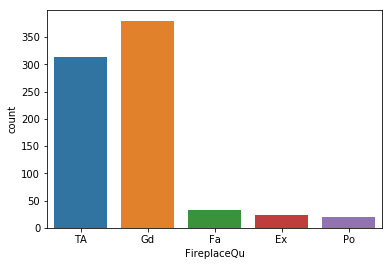

In [445]:
# Deal with variables with number of missing values close to 45%
sns.countplot(prices['FireplaceQu'])

In [446]:
prices['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

- Most of the fire places are either in Good or average condition.
- The difference in Gd, TA and rest is significant so we can impute the dataframe with either TA or Gd
- TA would is neither upper extreme nor lower extreme so we can impute missing values with Average that is TA

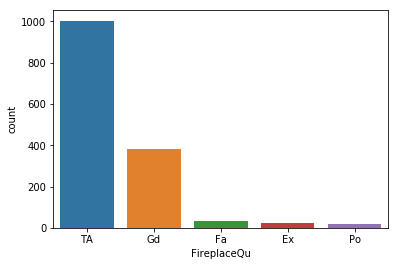

In [447]:
# imputing values 
prices['FireplaceQu'] = prices['FireplaceQu'].replace(np.nan, 'TA')
sns.countplot(prices['FireplaceQu'])

In [448]:
# Deal with variables with number of missing values close to 20%
prices['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

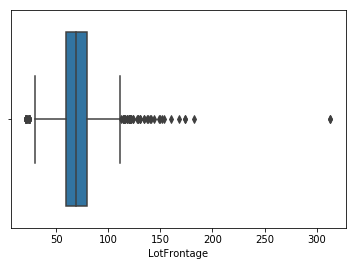

In [449]:
sns.boxplot(prices['LotFrontage'])

- Since, the most of data is distribution around is Q1, Q2 and Q3 we can impute the missing values with median value

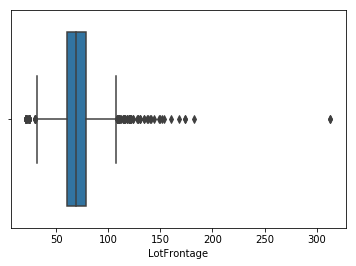

In [450]:
# imputing values
prices['LotFrontage'] = prices['LotFrontage'].fillna(prices['LotFrontage'].median())
sns.boxplot(prices['LotFrontage'])

In [451]:
prices['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [452]:
# check the missing values
prices.isnull().sum()/ len(prices) * 100

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

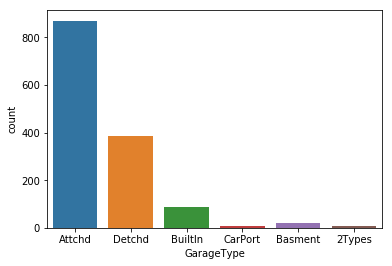

In [453]:
# deal with columns with missing values close to 5%
sns.countplot(prices['GarageType'])

- Number of Attchd is more than 2 times of Detchd GarageType 
- We can impute the missing data with 'Attchd'

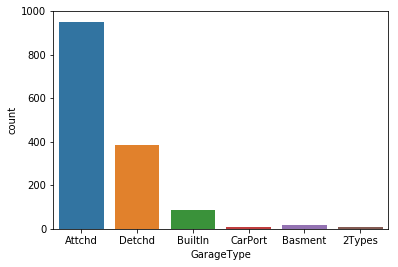

In [454]:
# imputing values
prices['GarageType'] = prices['GarageType'].replace(np.NaN, 'Attchd')
sns.countplot(prices['GarageType'])

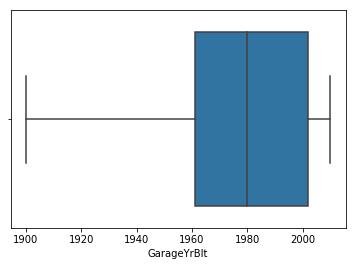

In [455]:
sns.boxplot(prices['GarageYrBlt'])

In [456]:
prices['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

- Since, the data distribution around 25%, 50% and 75% value is not localized.
- There is no need of outlier treatment.
- Missing values can be imputed with median value

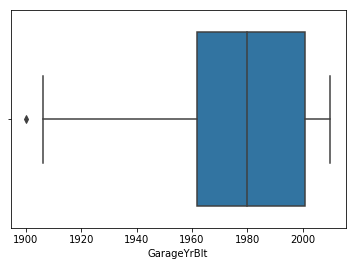

In [457]:
# imputing values
prices['GarageYrBlt'] = prices['GarageYrBlt'].fillna(prices['GarageYrBlt'].median())
sns.boxplot(prices['GarageYrBlt'])

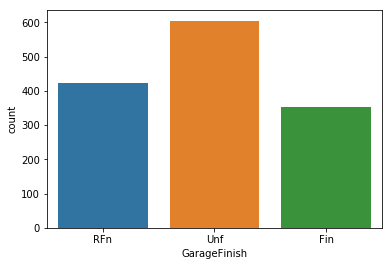

In [458]:
sns.countplot(prices['GarageFinish'])

- Unf is the highest in number 
- Since, the number of values to be imputed is less we can impute the NaN values with the most occuring values

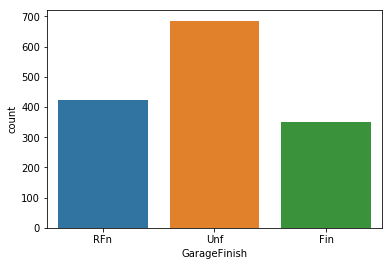

In [459]:
# imputing values
prices['GarageFinish'] = prices['GarageFinish'].replace(np.NaN, 'Unf')
sns.countplot(prices['GarageFinish'])

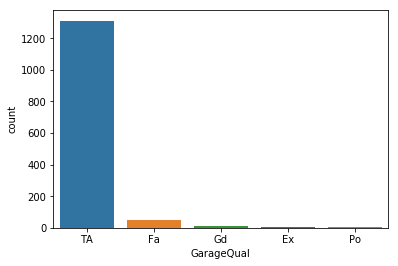

In [460]:
sns.countplot(prices['GarageQual'])

- Since, the most occuring value is TA.
- Occurance of the rest of the values is very less as compared to TA for 'GarageQual'.
- Missing values can be imputed with TA.

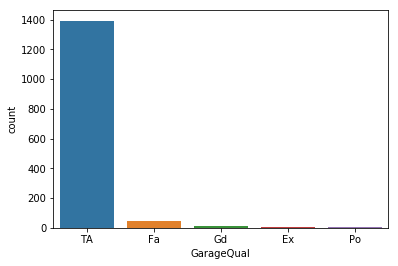

In [461]:
# imputing values
prices['GarageQual'] = prices['GarageQual'].replace(np.NaN,'TA')
sns.countplot(prices['GarageQual'])

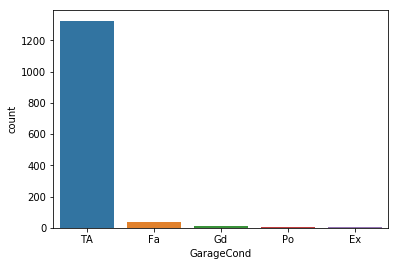

In [462]:
sns.countplot(prices['GarageCond'])

- Since, the most occuring value is TA.
- Occurance of the rest of the values is very less as compared to TA for 'GarageCond'.
- Missing values can be imputed with TA.

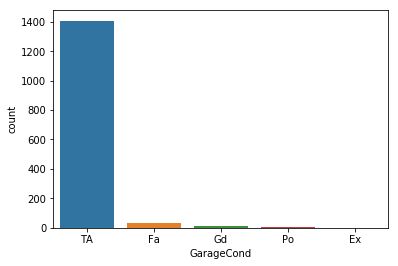

In [463]:
# imputing values
prices['GarageCond'] = prices['GarageCond'].replace(np.NaN,'TA')
sns.countplot(prices['GarageCond'])

In [464]:
# check the missing values
prices.isnull().sum()/ len(prices) * 100

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

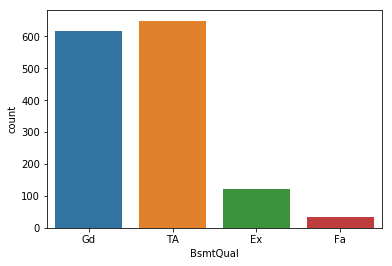

In [465]:
# dealing with variables with missing values close to 3%
sns.countplot(prices['BsmtQual'])

- The difference in number of values as 'TA' or 'Gd' is not much.
- TA would is neither be upper extreme nor lower extreme so we can impute missing values with Average that is TA
- Number of missing values is small so imputing with average values is a good option

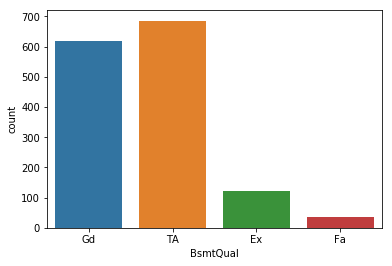

In [466]:
# imputing values
prices['BsmtQual'] = prices['BsmtQual'].replace(np.NaN,'TA')
sns.countplot(prices['BsmtQual'])

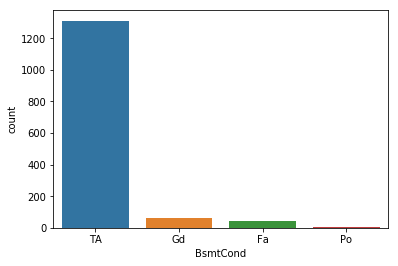

In [467]:
sns.countplot(prices['BsmtCond'])

- Since, the most occuring value is TA.
- Occurance of the rest of the values is very less as compared to TA for 'BsmtCond'.
- Missing values can be imputed with TA.

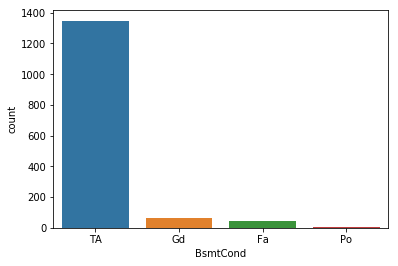

In [468]:
# imputing values
prices['BsmtCond'] = prices['BsmtCond'].replace(np.NaN,'TA')
sns.countplot(prices['BsmtCond'])

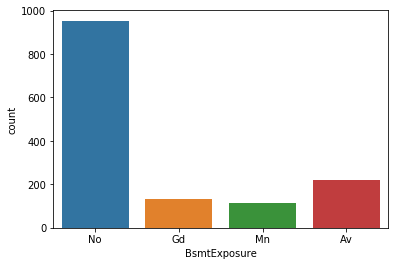

In [469]:
sns.countplot(prices['BsmtExposure'])

- Since, the most occuring value is No.
- Occurance of the rest of the values is very less as compared to No for 'BsmtExposure'.
- Missing values can be imputed with No.

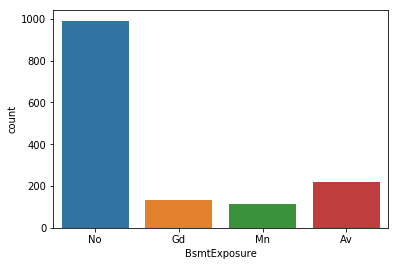

In [470]:
# imputing values
prices['BsmtExposure'] = prices['BsmtExposure'].replace(np.NaN,'No')
sns.countplot(prices['BsmtExposure'])

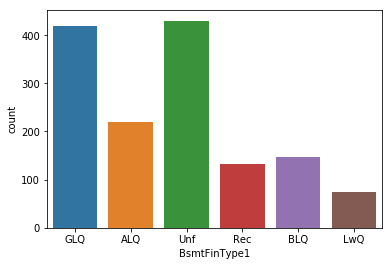

In [471]:
sns.countplot(prices['BsmtFinType1'])

In [472]:
prices['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

- Difference in 'Unf' and 'GLQ' is not much.
- GLQ is slightly lesser in number than 'Unf'
- Hence, missing values can be imputed with 'Unf'

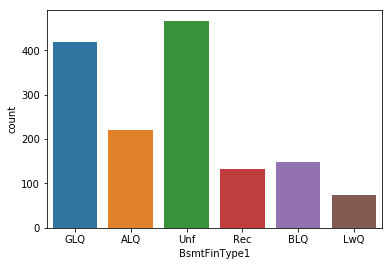

In [473]:
# imputing values
prices['BsmtFinType1'] = prices['BsmtFinType1'].replace(np.NaN,'Unf')
sns.countplot(prices['BsmtFinType1'])

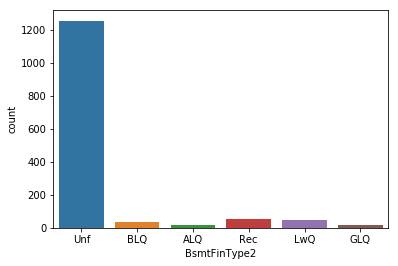

In [474]:
sns.countplot(prices['BsmtFinType2'])

- Since, the most occuring value is Unf.
- Occurance of the rest of the values is very less as compared to Unf for 'BsmtFinType2'.
- Missing values can be imputed with Unf.

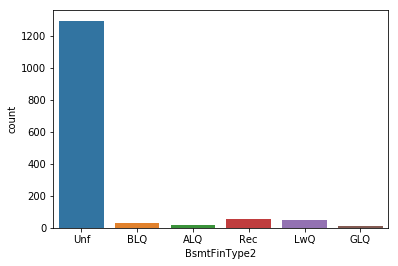

In [475]:
# imputing values
prices['BsmtFinType2'] = prices['BsmtFinType2'].replace(np.NaN,'Unf')
sns.countplot(prices['BsmtFinType2'])

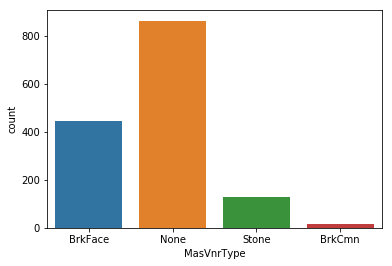

In [476]:
sns.countplot(prices['MasVnrType'])

- None is the most occuring value
- Only 0.5% values are being impiuted. 
- NaN values can be imputed with None.

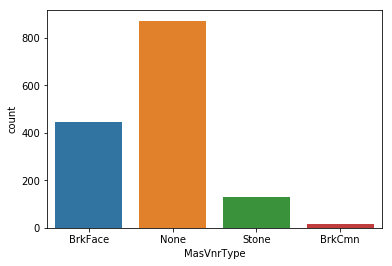

In [477]:
# imputing values
prices['MasVnrType'] = prices['MasVnrType'].replace(np.NaN,'None')
sns.countplot(prices['MasVnrType'])

In [478]:
# Rows with missing values close to 1% can be dropped.
prices.dropna(inplace=True)

In [479]:
# check the missing values
prices.isnull().sum()/ len(prices) * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

# Step 3: Exploratory Data Analysis

In [480]:
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,TA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


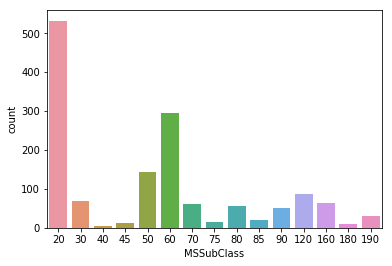

In [481]:
# Understanding MSSubClass:
sns.countplot(prices['MSSubClass'])

- Type of dwelling is mostly '1-STORY 1946 & NEWER ALL STYLES' followed by '2-STORY 1946 & NEWER'

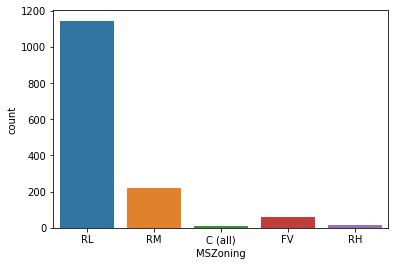

In [482]:
# Understanding general zoning classification of the sale.
sns.countplot(prices['MSZoning'])

- Type of zone classifiaction for sale is primarily 'Residential Low Density' followed by 'Residential Medium Density' which almost 15% in number of it.

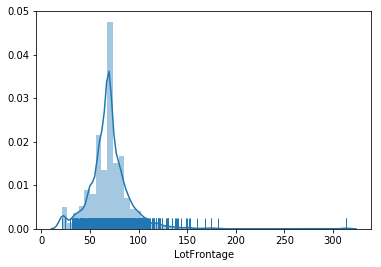

In [483]:
# Understanding LotFrontage.
sns.distplot(prices['LotFrontage'],rug=True)

In [484]:
prices['LotFrontage'].describe()

count    1451.000000
mean       69.845624
std        22.044429
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

- Majorly value of LotFrontage lies in the range 60 ft to 80 ft with median value of 70ft

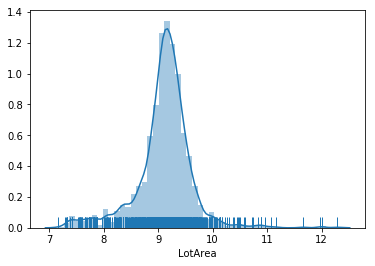

In [485]:
# Understanding LotArea.
sns.distplot(np.log(prices['LotArea']),rug=True)

In [486]:
prices['LotArea'].describe()

count      1451.000000
mean      10507.808408
std        9992.987081
min        1300.000000
25%        7537.500000
50%        9477.000000
75%       11600.000000
max      215245.000000
Name: LotArea, dtype: float64

- Majorly value of LotArea lies in the range 7500 sqft to 12000 sqft with median value of 9477 sqft

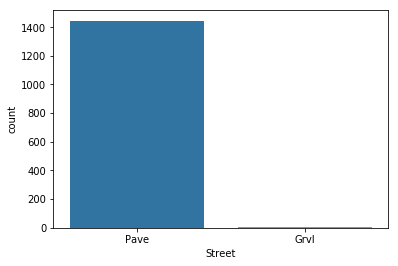

In [487]:
# Understanding Road access
sns.countplot(prices['Street'])

- Almost all of the road access to the property is through Paved road(more than 1450) with very less number of properties having a gravel road.

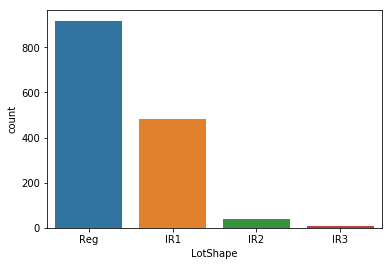

In [488]:
# Understanding LotShape
sns.countplot(prices['LotShape'])

- Most of the properties have Rectengular LotShape followed by those with very slight irregularities.


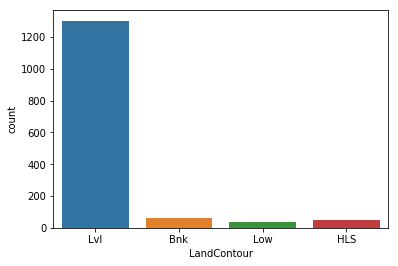

In [489]:
# Understanding Land Contour
sns.countplot(prices['LandContour'])

- Most of the properties have leveled land contour while other types of land contour are miniscule in number.



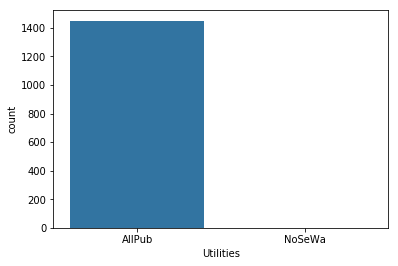

In [490]:
# Understanding Utilities
sns.countplot(prices['Utilities'])

- All of the properties have Public Utilities availble

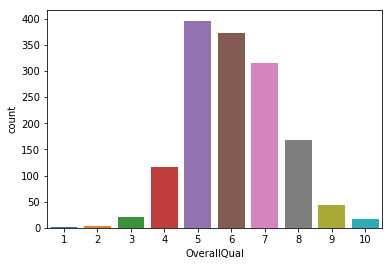

In [491]:
# Understanding Overall Quality of Property
sns.countplot(prices['OverallQual'])

- Most of the properties have Overall Quality rating in the range of 5 to 7 with 5 being the most.
- Very few properties have Overall Quality rating above 9.


In [492]:
prices['OverallQual'].describe()

count    1451.000000
mean        6.093728
std         1.381467
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

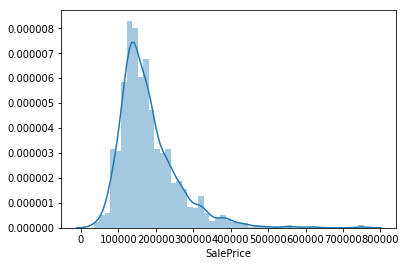

In [493]:
sns.distplot(prices['SalePrice'])

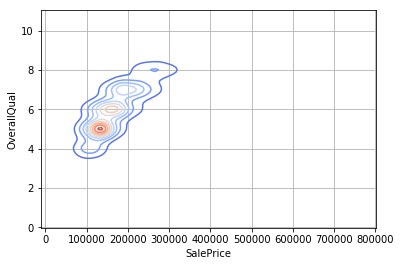

In [494]:
# Understanding relation in sale price and overallquality
sns.kdeplot((prices['SalePrice']),(prices['OverallQual']),cmap='coolwarm')
plt.grid()

- Most of the properties sold had SalePrice range between 120000 to 170000 with Overall Quality Rating between 4.5 and 5.8

# Step 4: Data Prepration

In [495]:
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,TA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [496]:
# let's change data type of below given variables to object so that we can get thier dummy variables

prices['MSSubClass'] = prices['MSSubClass'].astype(object)
prices['OverallQual'] = prices['OverallQual'].astype(object)
prices['OverallCond'] = prices['OverallCond'].astype(object)
prices['YearBuilt'] = prices['YearBuilt'].astype(object)
prices['YearRemodAdd'] = prices['YearRemodAdd'].astype(object)
prices['BedroomAbvGr'] = prices['BedroomAbvGr'].astype(object)
prices['BsmtHalfBath'] = prices['BsmtHalfBath'].astype(object)
prices['GarageYrBlt'] = prices['GarageYrBlt'].astype(object)
prices['YrSold'] = prices['YrSold'].astype(object)
prices['MoSold'] = prices['MoSold'].astype(object)

In [497]:
prices.shape

(1451, 77)

In [498]:
# Let's create dummy variables categorical data
categorical_data = prices.select_dtypes(include=['object'])
categorical_data.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtHalfBath,BedroomAbvGr,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,3,Gd,Typ,TA,Attchd,2003,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,1,3,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,0,3,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,0,3,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,0,4,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,12,2008,WD,Normal


In [499]:
dummies_categorical = pd.get_dummies(categorical_data, drop_first=True)
dummies_categorical.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1

In [500]:
# Let's concat the dummy and original dataset
prices = pd.concat([prices,dummies_categorical],axis=1)
prices = prices.drop(categorical_data.columns,axis=1)
prices.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRem

In [501]:
# Let's split the data in training and test dataset

X = prices.drop(['Id','SalePrice'],axis=1)
y = prices['SalePrice'] 

In [502]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [503]:
X_train.shape

(1015, 548)

In [504]:
y_train.shape

(1015,)

In [505]:
prices.shape

(1451, 550)

In [506]:
X_train.head(100)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,Ye

## Scaling the data:

In [507]:
scale = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
        'LowQualFinSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
        'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
        'MiscVal']

scaler = StandardScaler()

X_train[scale] = scaler.fit_transform(X_train[scale])

In [508]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,Ye

# Step 5: Model Building

In [509]:
# select multiple values for hyperparameter tuning

param_values = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge_model = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge_model, 
                        param_grid = param_values, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [510]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033001,0.006786,0.001858,0.000271,0.0001,{'alpha': 0.0001},-37513.174849,-35859.953077,-32133.332309,-43085.552907,-39956.638602,-37709.730349,3701.475111,28,-8381.157825,-9482.645772,-8677.999901,-8377.901022,-9515.149033,-8886.970711,511.488848
1,0.026262,0.010154,0.001487,0.000301,0.001,{'alpha': 0.001},-36376.915114,-35451.039958,-30823.318265,-38023.803005,-35392.476665,-35213.510601,2392.216180,27,-8402.932153,-9482.619638,-8704.641376,-8420.984943,-9553.328372,-8912.901296,505.993725
2,0.016898,0.000478,0.001272,0.000099,0.01,{'alpha': 0.01},-32048.747707,-32507.026093,-29053.460799,-31781.001616,-27952.352364,-30668.517716,1817.070795,26,-8541.615548,-9502.904973,-8753.867673,-8601.640543,-9637.433368,-9007.492421,466.549400
3,0.017359,0.001358,0.001266,0.000071,0.05,{'alpha': 0.05},-28318.531541,-27182.400727,-26537.213554,-27836.299785,-24633.910020,-26901.671125,1283.386382,25,-8877.511008,-9711.526857,-8897.243790,-8957.376343,-9733.898325,-9235.511265,398.730137
4,0.016847,0.000126,0.001280,0.000085,0.1,{'alpha': 0.1},-26772.026078,-24807.260567,-25183.030995,-26147.115381,-23223.901673,-25226.666939,1218.542959,24,-9170.508077,-9963.512651,-9095.782734,-9221.142264,-9839.921246,-9458.173394,366.431786


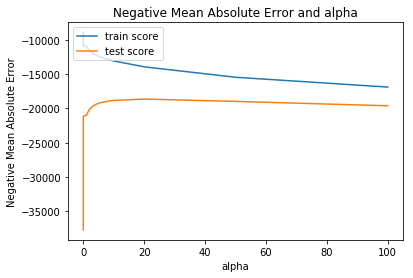

In [511]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [512]:
# optimal value os alpha for ridge is 20

alpha = 20
ridge_val = Ridge(alpha=alpha)

ridge_val.fit(X_train, y_train)
ridge_val.coef_

array([ 2.08611182e+03,  4.07212063e+03,  1.60105012e+03,  8.25393969e+03,
        1.20884614e+03,  7.61574242e+01,  9.14223084e+03,  7.43549997e+03,
        7.63879748e+03, -1.11174981e+03,  1.17973227e+04,  3.46239594e+02,
        3.83204635e+03,  2.66668892e+03, -5.97682140e+03,  5.12148648e+03,
        2.89533915e+03,  5.39258557e+03,  3.82880163e+03,  1.97606981e+03,
        1.96560063e+02, -2.17609885e+02,  1.45493095e+03,  3.01695227e+03,
        4.08156964e+03,  5.50188737e+01, -4.33882261e+03,  2.33337199e+03,
        8.76461167e+02, -4.18235918e+03,  3.70681013e+03, -4.21647887e+01,
        6.71333387e+02,  5.56384560e+02, -1.91654630e+03, -8.76097863e+01,
       -5.62993855e+03, -2.61905581e+03,  7.73454194e+02, -2.09663435e+03,
        7.26278063e+03,  8.81420204e+02,  2.89744802e+03, -2.42056893e+03,
        9.31229197e+02,  7.44636941e+03,  1.87695166e+03,  5.63201703e+02,
        7.91974846e+03,  7.71857083e+02,  6.91382596e+03, -9.77715082e+02,
        7.25578449e+03, -

In [513]:
lasso_model = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso_model, 
                        param_grid = param_values, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   43.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [514]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.400744,0.052366,0.001400,0.000151,0.0001,{'alpha': 0.0001},-34379.334591,-35850.416272,-30048.421219,-34795.512783,-33440.068532,-33702.750680,1984.312880,28,-8518.999798,-9514.156262,-8738.496482,-8547.874920,-9594.278713,-8982.761235,473.328712
1,0.428115,0.091700,0.001502,0.000554,0.001,{'alpha': 0.001},-34368.707747,-35827.230822,-30047.228344,-34790.665820,-33427.051185,-33692.176784,1978.826358,27,-8519.001652,-9513.983134,-8738.370339,-8547.896516,-9594.249342,-8982.700197,473.290942
2,0.303822,0.018539,0.001241,0.000092,0.01,{'alpha': 0.01},-34303.316834,-35652.518496,-30015.229653,-34728.983370,-33297.751111,-33599.559893,1945.457379,26,-8519.356482,-9512.654169,-8737.340137,-8548.507457,-9594.256735,-8982.422996,472.919553
3,0.334913,0.046792,0.001344,0.000093,0.05,{'alpha': 0.05},-34092.878394,-35496.950474,-29850.590564,-34409.442897,-32722.683659,-33314.509198,1945.084991,25,-8522.430027,-9508.887868,-8733.713667,-8552.217498,-9595.669249,-8982.583662,471.542730
4,0.305562,0.013258,0.001192,0.000009,0.1,{'alpha': 0.1},-33839.364074,-35324.263542,-29662.021568,-34032.293641,-32037.767209,-32979.142007,1961.539186,24,-8527.026250,-9505.912690,-8731.026371,-8559.387766,-9597.432583,-8984.157132,469.426987


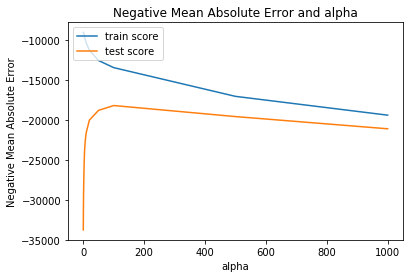

In [515]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [516]:
# optimal value os alpha for lasso is 65



alpha = 65
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=65, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [517]:
# getting the coefficient values
lasso.coef_

array([ 1.68625274e+03,  4.49994678e+03,  5.62016910e+02,  8.40847126e+03,
        1.45733665e+03, -0.00000000e+00,  7.16787165e+03,  1.31717257e+03,
        0.00000000e+00, -1.86460800e+03,  2.16418382e+04,  2.57877246e+02,
        2.51332647e+03,  1.33486764e+03, -5.10659322e+03,  3.16936249e+03,
        2.02752750e+03,  4.70952807e+03,  3.05097781e+03,  1.53276946e+03,
        0.00000000e+00, -0.00000000e+00,  1.18761854e+03,  2.80264606e+03,
        3.97069026e+03, -0.00000000e+00, -3.40874558e+03,  0.00000000e+00,
        0.00000000e+00, -1.77567108e+03,  5.23677245e+03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -9.14870104e+03, -1.97331240e+03, -0.00000000e+00, -6.85032111e+02,
        1.05532374e+04,  0.00000000e+00,  5.69061928e+03, -0.00000000e+00,
        0.00000000e+00,  7.34843615e+03,  0.00000000e+00,  1.37113649e+03,
        7.83907248e+03,  0.00000000e+00,  8.54019457e+03, -0.00000000e+00,
        9.86703399e+03, -

In [524]:
# Significant variables of the regression model:
coef_val = pd.Series(lasso.coef_, index = X_train.columns)
coef_val.head()

LotFrontage    1686.252740
LotArea        4499.946779
MasVnrArea      562.016910
BsmtFinSF1     8408.471256
BsmtFinSF2     1457.336649
dtype: float64

In [544]:
# let's plot coeff with the variables
df_coeff = pd.DataFrame()
df_coeff['Coeff'] = coef_val
df_coeff['Variable'] = X_train.columns
df_coeff['Coeff'].sort_values(ascending=False)

OverallQual_10            79664.343907
OverallQual_9             59740.753633
Neighborhood_StoneBr      32226.074290
SaleType_New              24908.711789
Neighborhood_NridgHt      24515.193493
Neighborhood_NoRidge      23252.130688
OverallCond_9             22088.891413
OverallQual_8             21749.189070
GrLivArea                 21641.838236
GarageYrBlt_2009.0        20026.621042
YearRemodAdd_2010         18158.126348
Neighborhood_Crawfor      16010.021052
YearBuilt_2008            15276.124943
OverallCond_7             13027.241592
OverallCond_8             12251.365333
BsmtExposure_Gd           11575.986947
Functional_Typ            11195.243922
MSZoning_FV               10553.237435
Neighborhood_Somerst      10406.540655
Exterior1st_BrkFace       10229.606760
LotConfig_CulDSac          9867.033987
SaleCondition_Normal       9506.396212
LandContour_Lvl            8540.194568
BsmtFinSF1                 8408.471256
Condition1_Norm            8384.225916
YearRemodAdd_1996        

In [521]:
# test lasso model accuracy on train dataset
ytrain_predit = lasso.predict(X_train)
(r2_score(y_true=y_train, y_pred = ytrain_predit))


0.9321620697180404

In [520]:
# test lasso model accuracy on test dataset
X_test[scale] = scaler.fit_transform(X_test[scale])
ytest_predit = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred = ytest_predit))


0.7596727720681575


In [522]:
# test ridge model on train dataset
ytrain_predit = ridge_val.predict(X_train)
(r2_score(y_true=y_train, y_pred = ytrain_predit))



0.9191271249586545

In [523]:
# test ridge model model on test dataset
X_test[scale] = scaler.fit_transform(X_test[scale])
ytest_predit = ridge_val.predict(X_test)
print(r2_score(y_true=y_test, y_pred = ytest_predit))



0.7424371807163486


# 1. R2 scores:

## Ridge regression:
1. Training Dataset - 0.9191
2. Test Dataset - 0.7424
## Lasso Regression:
1. Training Dataset - 0.9321
2. Test Dataset - 0.7596

# 2.Optimal hyperparameter values for Ridge and lasso regression:
1. optimal value os alpha for ridge is 20
2. optimal value os alpha for lasso is 65

# 3. Significant variables in predicting the price of a house:
1. OverallQual
2. Neighbourhood
3. SaleType